# Facial Imotion Recognition

##### Introduction

 In this project, I will detect the facial expression through automatic system. Emotion recognition
 is the process of identifying the human emotion. It the technology used for to analyse human
 emotions from images or live videos and then stated out the result on the basis of emotions
 classification.
 
 The programmed facial appearance has many applications for instance, Social Behaviour
 Understanding, recognition of mental condition, and artificial humanoid expression. One of the
 main uses of this automatic system is to evaluate the candidate during the interview and to
 measure how he defended to certain questions. It is also useful and important for security and
 healthcare purposes.
 
 I have worked on facial emotion recognition, build a model using TensorFlow library. This project
 will recognize your facial emotions using live webcam feed. The main processes in this project
 are as follows:
 
 ###### • Upload and Adjust the Data set
 
 ###### • Implementing the Facial Emotion Recognition Model Using CNN
 
 ###### • Compile And Train Model Using CNN
 
 ###### • Evaluate the Model
 
 ###### • Save CNN Model
 
 ###### • Evaluate The Model
 
 ###### • Test the Model

# Importing Libraries






In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

2021-09-12 10:12:57.352482: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


### About Dataset

I have downloaded the data set from the Kaggle.com, publicly available on it. There are two
 folders one is for training images and other is for testing images. Training Data set has 28709
 images and testing data set has total 7,178 examples.
 The data set consists of 48*48 pixels faces images along with the emotions tag. The faces have
 been consequently enlisted so the face is pretty much more focused and occupies about a
 similar measure of space in each picture.
 The data set is classified into seven different facial expressions. (0: Angry, 1: Disgust, 2: Fear, 3:
 Happy, 4: Sad, 5: Surprise, 6: Neutral).

# Displaying Images

In [3]:
picture_size = 48
folder_path = "../input/face-expression-recognition-dataset/images/"

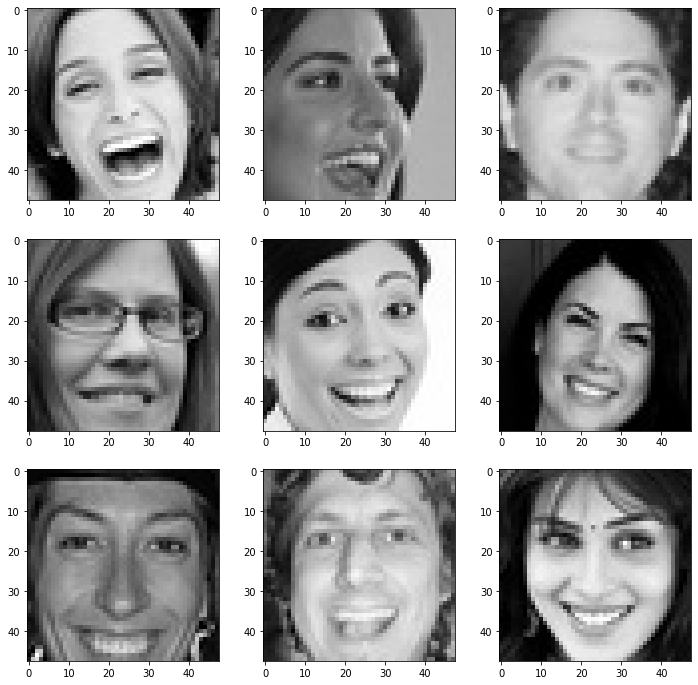

In [4]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

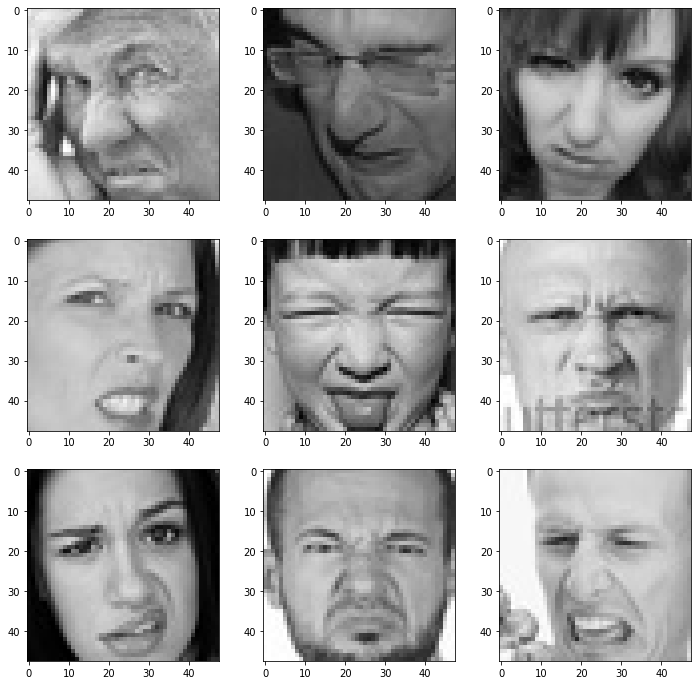

In [5]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Validation Data

In [21]:
batch_size=128
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set= datagen_train.flow_from_directory(folder_path+"train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"validation",
                                       target_size=(picture_size,picture_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


There are lot of ML and deep learning algorithms which you can use for to train this type of data
 set. But I have used the most popular deep learning architecture for recognition problems, such
 as Convolutional Neural Network because it is one of the most powerful modules of deep
 learning. Normally it’s gives higher accuracy, if you train your model on it. As my data set related
 to facial images, so I decided to use this model.

 The model used to abstract the features from images to detect the emotions. There are specific
 layers that extract the features of this image, it keeps extracting the features and then classify all
 those images and then accordingly recognize the image.

 Designing the CNN model for emotion recognition using functional API. I have added the CNN
 layers. Like, Conv2D layer, Batch Normalization, Max-Pooling2D, Dropout layer, Flatten and then
 fitted the data to fully linked dense layer.
     
 • I have added Four CNN layer with the same Parameters.
 
 • Added flatten layer to convert the data of CNN into 1D that would be fitted for fully connected
 Dense layer.
 
 • Then compile the data with 2 Dense Layers.
 Network
 
 • The CNN contains 64 filters in the first layer with ReLU, 128 filters on the second layer, 512 on
 the third and then again 512 on to the fourth layer of CNN model. All layers use ReLU activation.
 Max Pooling was done after every CNN layer to improve the speed of the network.
 
 • A dense network was built over the CNN. It contains first dense layer with 256, second dense
 layer of 512 and then added 7 neuron with activation SoftMax.
 
 • Batch normalization was done before every layer in the network

# Model Building

In [16]:
no_of_classes=7

model=Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#2nd CNN layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_9 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_9 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_10 (Batc (None, 24, 24, 128)      

# Fitting the Model with Training and Validation Data

Early Stopping
 It is when my model is going to fetch the data that the accuracy is very good at this stage is this
 iteration so that will stop that iteration. It will check that model performance is improving or not
 then it will stop the training process, and will pick the best iteration model.
 Reduce Learning rate
 It is responsible to determine the optimal value of Learning rate that was being used in the
 training process

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

#### Training the model
Now I am going train my model with the facial expressions data set. The file contains 28,709
 examples, 7 folders and size of the file is 43MB.

In [22]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-09-12 10:29:59.646073: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-12 10:29:59.650537: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/48


2021-09-12 10:30:01.184226: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-12 10:30:02.080952: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-12 10:30:02.118051: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


225/225 [==============================] - 165s 700ms/step - loss: 1.9170 - accuracy: 0.2713 - val_loss: 1.5695 - val_accuracy: 0.4071
Epoch 2/48
225/225 [==============================] - 30s 132ms/step - loss: 1.4542 - accuracy: 0.4382 - val_loss: 1.3962 - val_accuracy: 0.4744
Epoch 3/48
225/225 [==============================] - 30s 131ms/step - loss: 1.2821 - accuracy: 0.5069 - val_loss: 1.2841 - val_accuracy: 0.5138
Epoch 4/48
225/225 [==============================] - 30s 133ms/step - loss: 1.1848 - accuracy: 0.5479 - val_loss: 1.1735 - val_accuracy: 0.5614
Epoch 5/48
225/225 [==============================] - 30s 133ms/step - loss: 1.1237 - accuracy: 0.5754 - val_loss: 1.3103 - val_accuracy: 0.4747
Epoch 6/48
225/225 [==============================] - 29s 129ms/step - loss: 1.0747 - accuracy: 0.5898 - val_loss: 1.3306 - val_accuracy: 0.4913
Epoch 7/48
225/225 [==============================] - 29s 130ms/step - loss: 1.0090 - accuracy: 0.6181 - val_loss: 1.0748 - val_accuracy: 0.

### Save CNN Model
 This is the file of updated weights that save in the directory

In [23]:
model.save_weights('face_emotion_model.h5')

# Plotting Accuracy & Loss

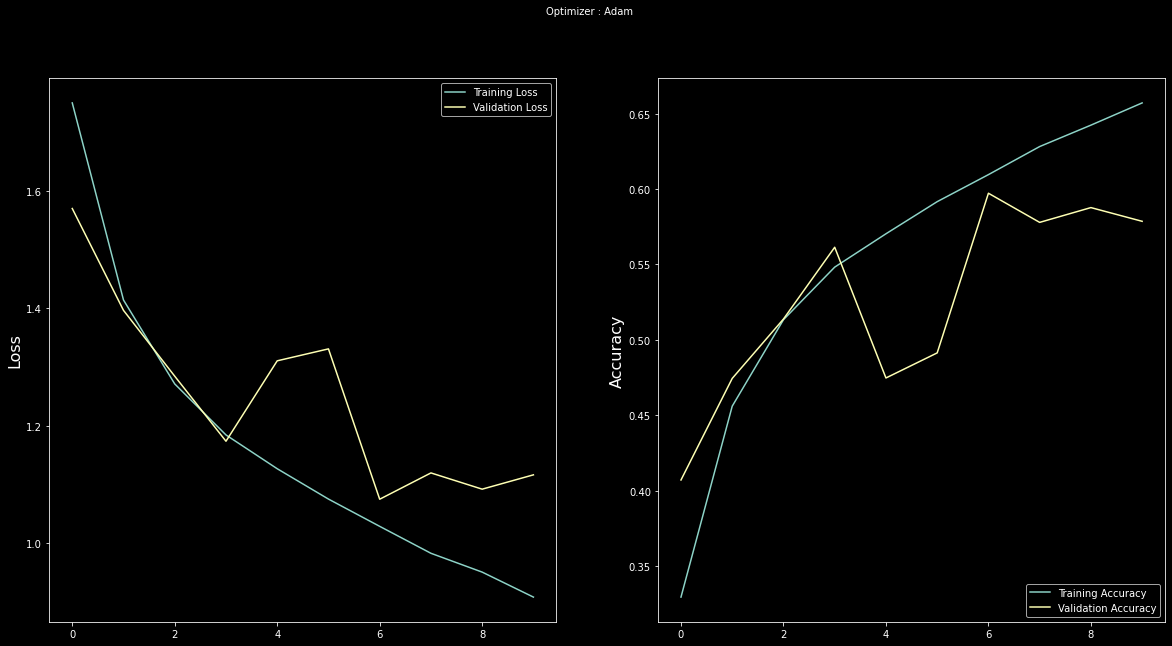

In [24]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Model Result

Test the Model

In [4]:
import numpy as np
from tensorflow.keras.models import load_model
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from time import sleep

In [2]:
face_classifier = cv2.CascadeClassifier(r'haarcascade_frontalface_default.xml')
classifier =load_model(r'face_emotion_model.h5')

emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

cap = cv2.VideoCapture(0)


while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y-10)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

## Model Output

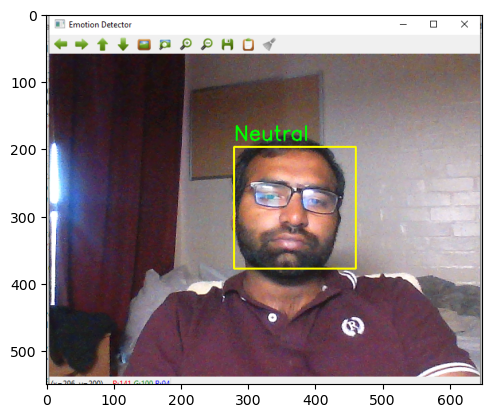

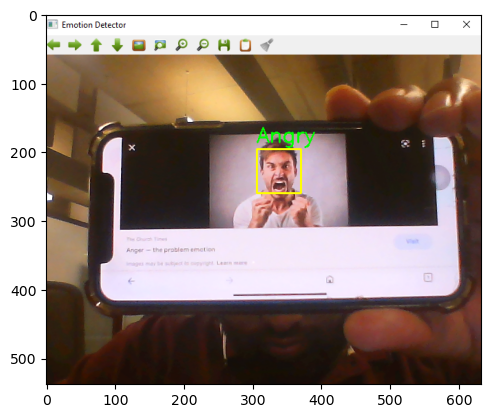

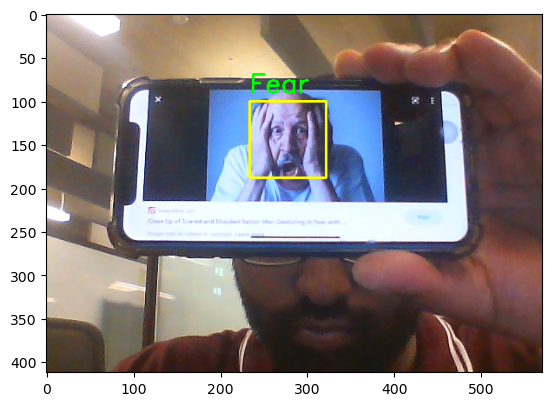

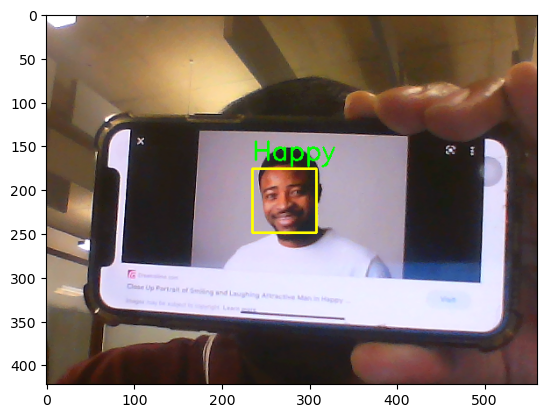

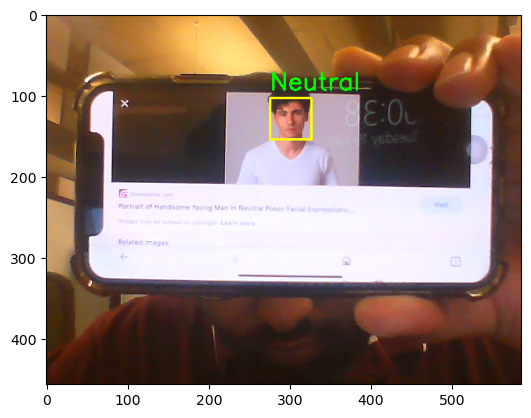

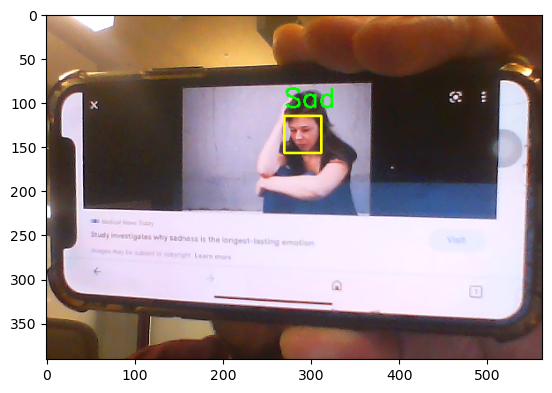

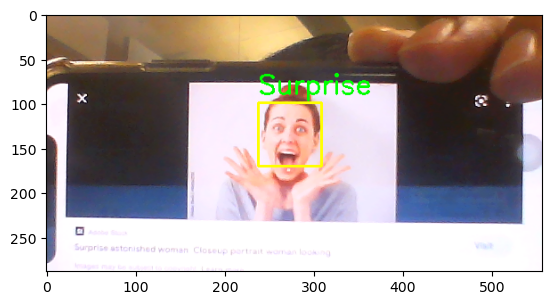

In [9]:
model_output_image = os.listdir('Results')
for i in model_output_image:
    curImg = cv2.imread('Results'+"/"+i)
    plt.imshow(cv2.cvtColor(curImg,cv2.COLOR_BGR2RGB))
    #plt.imshow(curImg)
    plt.show()